In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [3]:
def get_spectrum(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = fshift
    return magnitude_spectrum

In [4]:
def plot_doub(num1, num2, img, spec):
    plt.subplot(num1),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(num2),plt.imshow(spec, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
def plot(num1,spec):
    plt.subplot(num1),plt.imshow(spec, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

In [5]:
path = '/Users/agalicina/Term10/genehack/processed_images/bad_pics/'
imgname = '_20140925_120245__005_000.png'

In [6]:
len(img_mask)

NameError: name 'img_mask' is not defined

In [7]:
img_mask = cv2.resize(cv2.imread(path+'pic_nucleus'+imgname,0), (150,150))
img_pic  = cv2.resize(cv2.imread(path+'nucleus'+imgname,0), (150,150))

spec_mask = get_spectrum(img_mask)
spec_pic  = get_spectrum(img_pic)

pl1 = 20*np.log(np.abs(spec_mask))
pl2 = 20*np.log(np.abs(spec_pic))
pl3 = 20*np.log(np.abs(spec_pic-spec_mask))

In [248]:
?cv2.resize

In [ ]:
cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])

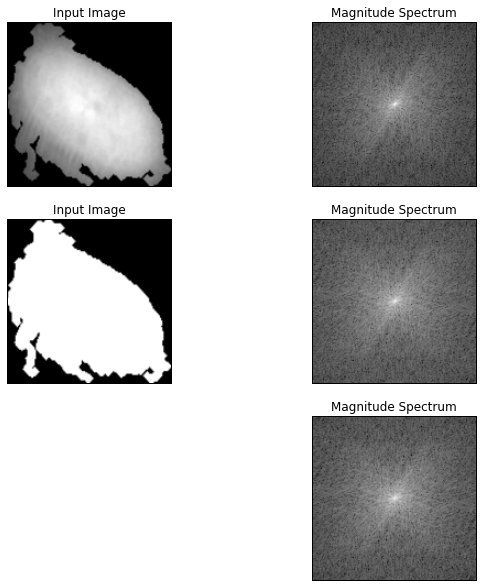

In [8]:
plt.figure(figsize=(10,10))
plot_doub(321,322,img_mask, pl1)
plot_doub(323,324,img_pic, pl2)
plot(326, pl3)
plt.show()

In [17]:
x = cv2.getGaussianKernel(150,100)
gaussian = x*x.T

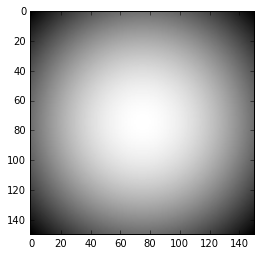

In [18]:
plt.imshow(gaussian, cmap = 'gray')

In [10]:
filters=[gaussian]
filter_name=['gaussian']

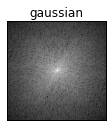

In [19]:
res = gaussian*pl3
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in xrange(1):
    plt.subplot(2,3,i+1),plt.imshow(res, cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

In [20]:
np.sum(res)

145.47815599309743

In [247]:
?cv2.getGaussianKernel

###  Гаусс не работает, переключаюсь на алгоритм оценки центра масс, границы маски 

In [172]:
import cv2
import numpy as np


In [178]:
?cv2.threshold

In [179]:
ret,thresh = cv2.threshold(img,1,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

In [186]:
cnt = contours[0]
M = cv2.moments(cnt)
print M

{'mu02': 7769292.336770743, 'mu03': 43036237.15033531, 'm11': 37344476.75, 'nu02': 0.07505817428958207, 'm12': 2656726854.9, 'mu21': -8976228.111799955, 'mu20': 9799466.567205623, 'nu20': 0.09467143694221841, 'm30': 4467341402.95, 'nu21': -0.0008597348815510648, 'mu11': 1850216.613172464, 'mu12': 10967122.090742052, 'nu11': 0.017874714324715588, 'nu12': 0.0010504208777008758, 'm02': 38443335.83333333, 'm03': 3007102984.4500003, 'm00': 10174.0, 'm01': 558639.1666666666, 'mu30': -10133059.382377625, 'nu30': -0.00097053511779698, 'nu03': 0.0041219712542964445, 'm10': 646425.5, 'm20': 50871407.5, 'm21': 3019411337.4}


In [188]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx, cy)

(63, 54)


In [190]:
area = cv2.contourArea(cnt)
area

10174.0

In [191]:
perimeter = cv2.arcLength(cnt,True)
perimeter

487.5289980173111

In [192]:
hull = cv2.convexHull(cnt)

In [195]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(img,ellipse,(0,255,0),2)

In [200]:
?cv2.findContours

In [229]:
ret,thresh = cv2.threshold(img,0,255,0)
#contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [228]:
cv2.drawContours(img, contours, -1, (0,255,0), 3)

In [237]:

# find contours
coins_contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# make copy of image
coins_and_contours = np.copy(img)

# find contours of large enough area
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

# draw contours
cv2.namedWindow("preview")
img = cv2.imshow("preview", img)
#img = cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))
cv2.waitKey()
plt.imshow(img)

error: /tmp/opencv20160315-50183-1nbb268/opencv-2.4.12/modules/highgui/src/window.cpp:261: error: (-215) size.width>0 && size.height>0 in function imshow


In [232]:
?cv2.drawContours

In [218]:
%matplotlib inline

In [169]:
class Border():
    def __init__(self, img):
        self.img = img.copy()
        self.border_mask = self.get_border()
    
    def get_border(self):
        empty_image = self.img.copy()
        empty_image.fill(0)
        
        for i in range(1,len(img)-1):
            for j in range(1,len(img[0])-1):
                if (img[i, j]>0)and(np.any(img[i-1:i+2, j-1:j+2]==0)):
                    empty_image[i, j] = 1
        for i in range(0,len(img)):
            if (img[i,0]>0):
                empty_image[i,0] = 1
            if (img[i,len(img[0])-1]>0):
                empty_image[i,len(img[0])-1] = 1
        for j in range(0,len(img[0])):
            if (img[0,j]>0):
                empty_image[0,j] = 1
            if (img[len(img)-1,j]>0):
                empty_image[len(img)-1,j] = 1
                
        return empty_image.copy()
    
    def get_P():
        pass
    
    def get_S():
        pass

    def get_P_by_S():
        pass
    
    def get_angles():
        pass
    
    def get_COM():
        pass
    
    def get_symmetry():
        pass
    

In [170]:
a = Border(img)

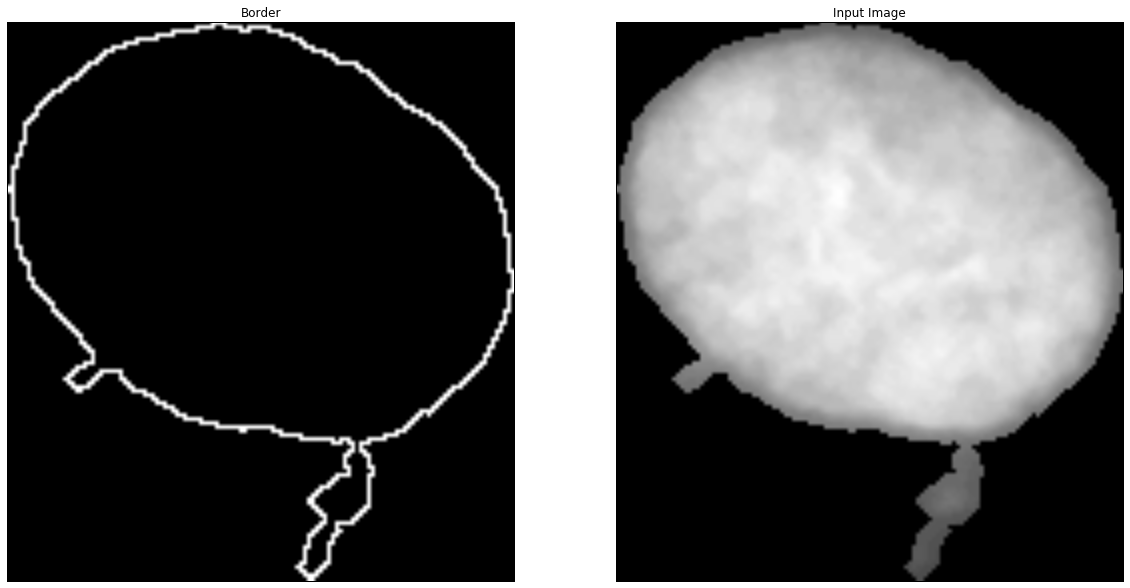

In [171]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(a.border_mask, cmap = 'gray')
plt.title('Border'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [113]:
len(img[10])

127

In [122]:
i=3
j=3
img[0:2, 0:2].size

4

In [76]:
img[0:3,0:3]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [79]:
img[0,0]

0